# Import relevant libraries

In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
from pprint import pprint as pp
from networkx.algorithms import bipartite as bp
import matplotlib.pyplot as plt

# Load & Clean data
- we extracted the column list from the original csv file 'tracks_from_albums.csv'
- then extract a list containing 'name' only to see how many items.name we have and the maximum number of artists it contains within each item
- we then iterate from 0-31 items & 0-7 artists row by row to create a new data frame that contains all the artists and track id

In [2]:
# get current working directory
wd = os.getcwd()
wd

'/Users/Isabella/Desktop/Group4SMM638'

In [3]:
# %% import and clean data
# import data
infile = os.path.join(wd, 'dataset', 'tracks_from_albums.csv')
tracks = pd.read_csv(infile)

/Users/Isabella/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (282,283,284,285,286,287,288,289,290,291,292,293,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,702,703,704,705,706,707,836,837,838,839,840,841,936,940,970,971,972,973,974,975,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1762,1763,1764,1765,1766,1767,1896,1897,1898,1899,1900,1901,2024,2025,2026,2027,2028,2029,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773,3122,3123,3124,3125,3126,3127,3128,3129,3130,3131,3132,3133,3460,3570,3680,3790,3900,4010,4015) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# get a list of all the column names
col_lst = tracks.columns.tolist()
col_lst

['_id',
 'href',
 'items.0.artists.0.external_urls.spotify',
 'items.0.artists.0.href',
 'items.0.artists.0.id',
 'items.0.artists.0.name',
 'items.0.artists.0.type',
 'items.0.artists.0.uri',
 'items.0.artists.1.external_urls.spotify',
 'items.0.artists.1.href',
 'items.0.artists.1.id',
 'items.0.artists.1.name',
 'items.0.artists.1.type',
 'items.0.artists.1.uri',
 'items.0.artists.2.external_urls.spotify',
 'items.0.artists.2.href',
 'items.0.artists.2.id',
 'items.0.artists.2.name',
 'items.0.artists.2.type',
 'items.0.artists.2.uri',
 'items.0.artists.3.external_urls.spotify',
 'items.0.artists.3.href',
 'items.0.artists.3.id',
 'items.0.artists.3.name',
 'items.0.artists.3.type',
 'items.0.artists.3.uri',
 'items.0.available_markets.0',
 'items.0.available_markets.1',
 'items.0.available_markets.2',
 'items.0.available_markets.3',
 'items.0.available_markets.4',
 'items.0.available_markets.5',
 'items.0.available_markets.6',
 'items.0.available_markets.7',
 'items.0.available_mar

In [5]:
# get a list of columns that contains artist & track name 
# to see the maximum number of artists of all the items
col_lst2 = []

for i in range(len(col_lst)):
    if col_lst[i].split('.')[-1] == 'name':
        col_lst2.append(col_lst[i])

col_lst2
# we have 31 items, and within each item, the maximum number of artists is 7

['items.0.artists.0.name',
 'items.0.artists.1.name',
 'items.0.artists.2.name',
 'items.0.artists.3.name',
 'items.0.name',
 'items.1.artists.0.name',
 'items.1.artists.1.name',
 'items.1.artists.2.name',
 'items.1.artists.3.name',
 'items.1.name',
 'items.2.artists.0.name',
 'items.2.artists.1.name',
 'items.2.artists.2.name',
 'items.2.artists.3.name',
 'items.2.artists.4.name',
 'items.2.artists.5.name',
 'items.2.name',
 'items.3.artists.0.name',
 'items.3.artists.1.name',
 'items.3.artists.2.name',
 'items.3.artists.3.name',
 'items.3.artists.4.name',
 'items.3.artists.5.name',
 'items.3.artists.6.name',
 'items.3.artists.7.name',
 'items.3.name',
 'items.4.artists.0.name',
 'items.4.artists.1.name',
 'items.4.artists.2.name',
 'items.4.artists.3.name',
 'items.4.name',
 'items.5.artists.0.name',
 'items.5.artists.1.name',
 'items.5.artists.2.name',
 'items.5.artists.3.name',
 'items.5.artists.4.name',
 'items.5.name',
 'items.6.artists.0.name',
 'items.6.artists.1.name',
 'items

In [6]:
# create a data frame that contains all the artists and the track_id associated with each
artist_track = pd.DataFrame(columns = ['artist', 'track_id'])

for i in range(0, 32):
    for j in range(0, 8):
        artist_col = 'items.' + str(i) + '.artists.' + str(j) + '.name'
        track_id = 'items.' + str(i) + '.id'
        if artist_col in col_lst:
            temp_df = tracks.loc[:, (artist_col, track_id)]
            temp_df = temp_df.rename(columns = {artist_col : 'artist', track_id : 'track_id'})
            artist_track = pd.concat([artist_track, temp_df])
artist_track = artist_track.dropna()

artist_track.head()

,artist,track_id
0,Kanye West,7lIr3vVhpDkU5mQEDcnA0S
1,Kanye West,5CaXxLM568tBh1PwhXdciZ
2,Ariana Grande,3ko9jEHNt4O5fjKN65ULJp
3,Miguel,0UfFgUjXDKKbm0Wjg7xJvB
4,Nas,2XQrvYopdCkOenX4Z5CdV7


In [7]:
# to keep record of how many unique tracks we have
tracks_uni = set(list(artist_track.track_id))
len(tracks_uni)

55673

In [8]:
# to keep record of how many unique artists in this dataset we have
artists_uni = set(list(artist_track.artist))
len(artists_uni)

3661

# Project a 2-mode, non-weighted network for collaboration 
- bottom nodes: artists
- top nodes: tracks
- get a 1-mode network (artist-artist) from this 2-mode network
- edge: an edge will be built between two artists if they collaborated

In [9]:
# import partition
infile2 = os.path.join(wd, 'partition.csv')
partition = pd.read_csv(infile2)
partition

,artist,community
0,JID,0
1,Kanye West,0
2,Empress Of,1
3,Ne-Yo,1
4,Murda Beatz,1
...,...,...
310,T.I.,0
311,Daniel Caesar,1
312,Dreamville,0
313,Sheck Wes,0


In [10]:
new_df = pd.merge(artist_track, partition, on = 'artist')
new_df

,artist,track_id,community
0,Kanye West,7lIr3vVhpDkU5mQEDcnA0S,0
1,Kanye West,5CaXxLM568tBh1PwhXdciZ,0
2,Kanye West,5X1YAG6achNpwegOnpSpW4,0
3,Kanye West,0yhxBvedRdGxsPZHJNI4VA,0
4,Kanye West,3HCh4McsKGmXRF6sA3XRVn,0
...,...,...,...
66409,Static Major,07yzjL0GV0eSLAHW5qUPq4,14
66410,King Combs,4Tc9PHEoeP17PQj3OOKXPu,2
66411,King Combs,5nCL0ULKVpkeJdQJ4UYVAI,2
66412,King Combs,6DozK7bs3HQeVEBtTJ7sQB,2


In [11]:
# %% graph creation
bg = nx.Graph()

# assign bottom & top nodes
bottom_nodes = list(set(new_df.artist))
top_nodes = list(set(new_df.track_id))

# add nodes
bg.add_nodes_from(bottom_nodes, bipartite=0)
bg.add_nodes_from(top_nodes, bipartite=1)

In [12]:
# get edge list
edge = []

for i in zip(new_df.artist, new_df.track_id):
    edge.append(i)

# add edge
bg.add_edges_from(edge)

In [13]:
# `is bipartite` check
is_bip = nx.is_bipartite(bg)
is_bip

True

In [14]:
# project a one-mode, artist-artist network graph from two-mode, artist-track network
g_b = bp.projected_graph(bg, bottom_nodes)

# Plot the artist-artist, non-weighted, network graph

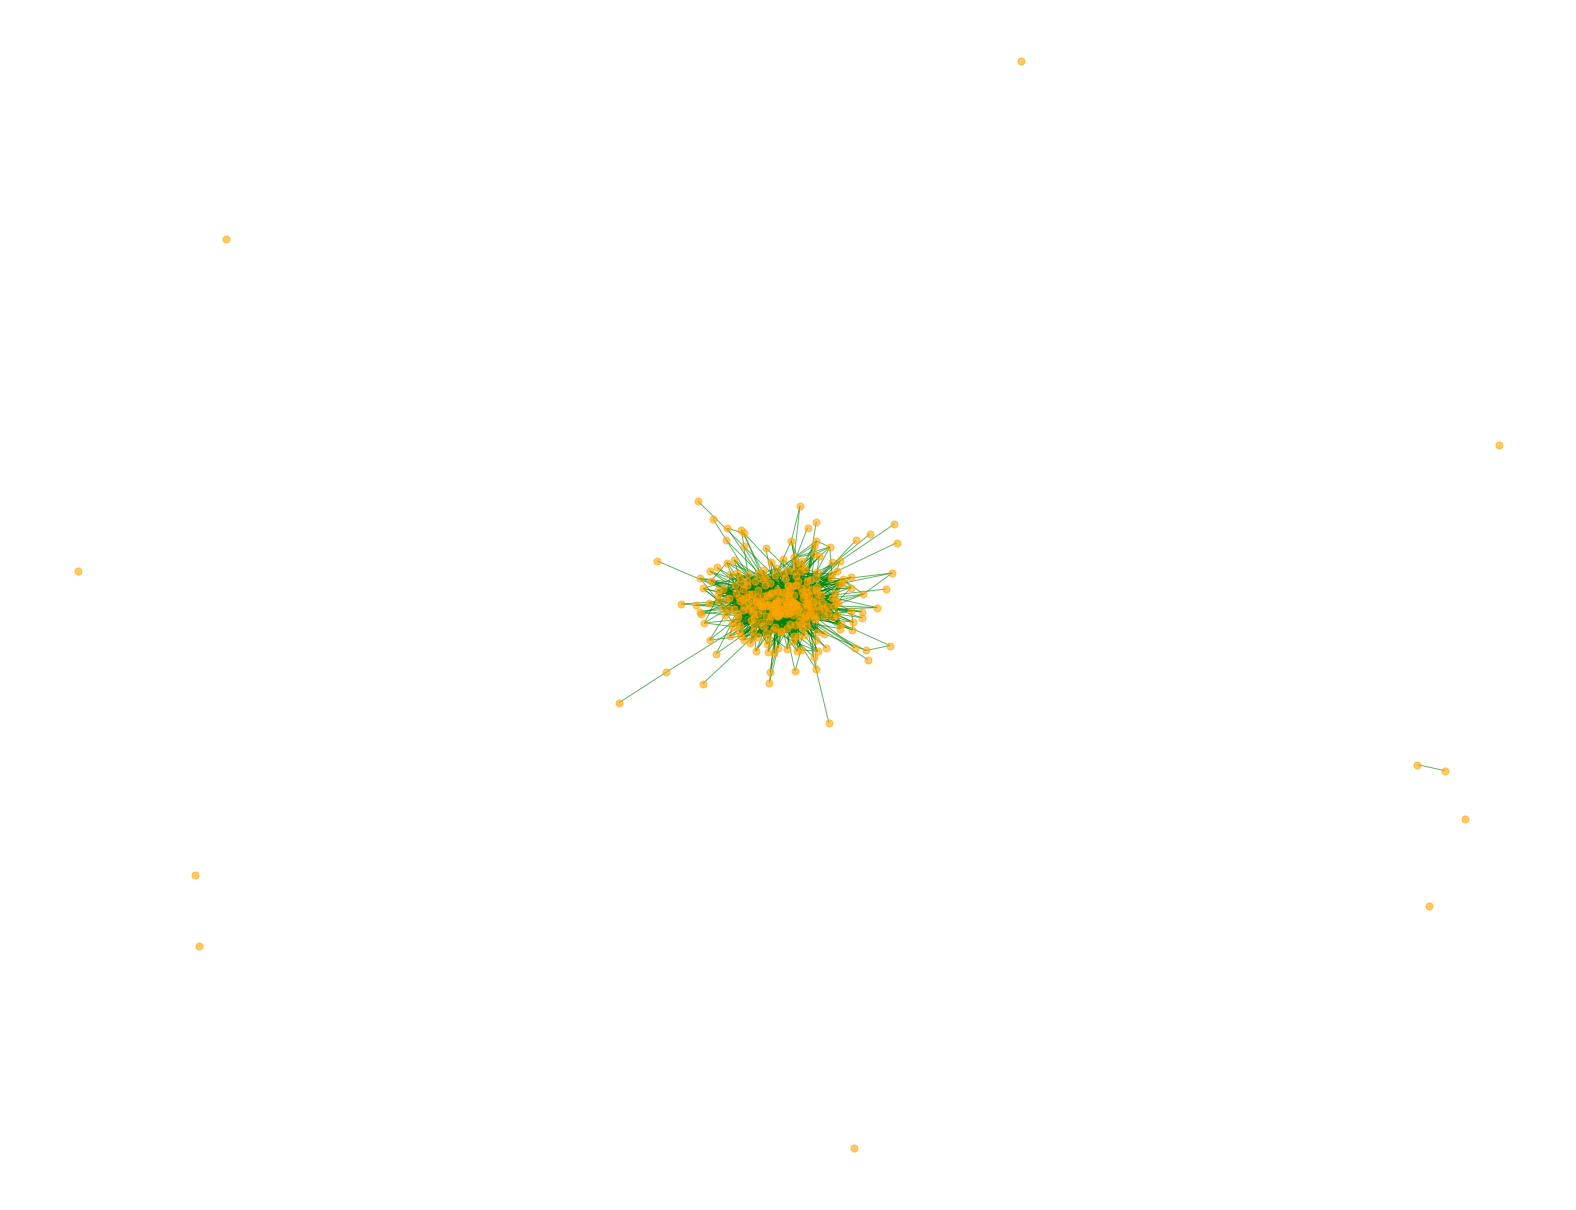

In [15]:
# set the figure
fig = plt.figure(figsize = (28, 22))
pos = nx.spring_layout(g_b)

# drawing options
options = {'alpha': 0.6,'node_size': 50}

# draw the network
nx.draw_networkx_nodes(g_b, pos, 
                       node_color ='orange',
                       **options)

nx.draw_networkx_edges(g_b, pos, 
                       edge_color ='green',
                       **options)

plt.axis("off")

# save the plot
outfile = os.path.join(wd, 'track artist-artist graph.png')
plt.savefig(outfile)

# use Louvain algorithm to detect communities to filter artists that have never collaborated with others

In [16]:
import matplotlib.cm as cm
import community as community_louvain

In [17]:
partition_new = community_louvain.best_partition(g_b)
len(partition_new)

308

In [18]:
# modularity
print('\nModularity: '+
      str(community_louvain.modularity(partition_new, g_b)))

# create a list of communities and the number of nodes each community contains
communityList = sorted(list(set(partition_new.values())))
community1 = []

for c in communityList:
    nodeList = []
    for key, value in partition_new.items():
        if value == c:
            nodeList.append(key)
    if len(nodeList) > 2:
        community1.append(c)
    print('\nCommunity ' + str(c+1) + ' with total of ' + 
          str(len(nodeList)) +' nodes')
    print(sorted(nodeList))
print(community1)


Modularity: 0.24917021100997433

Community 1 with total of 58 nodes
['2 Chainz', 'Ashanti', 'Ball Greezy', 'Bebe Rexha', 'Belly', 'Big Sean', 'Bruno Mars', 'Busta Rhymes', 'Chris Brown', 'Clipse', 'DJ Khaled', 'Doja Cat', 'Dom Kennedy', 'Fabolous', 'Fat Joe', 'French Montana', 'G-Eazy', 'Gunplay', 'Hit-Boy', 'Iggy Azalea', 'Jagged Edge', 'Jay Rock', 'Jeremih', 'Jermaine Dupri', 'John Legend', 'Jon Z', 'Joyner Lucas', 'Juicy J', 'Lil Duval', 'Lil Wayne', 'Lil Xan', 'Logic', 'Meek Mill', 'Mustard', 'Nas', 'Ne-Yo', 'Nipsey Hussle', 'Plies', 'Pusha T', 'Rick Ross', 'Royce Da 5\'9"', 'Snoop Dogg', 'Stacy Barthe', 'Stevie Wonder', 'Swizz Beatz', 'T-Pain', 'T.I.', 'Tank', 'Tory Lanez', 'Trevor Daniel', 'Tyga', 'Wale', 'Wiz Khalifa', 'XXXTENTACION', 'YG', 'Yo Gotti', 'Yung Pinch', 'blackbear']

Community 2 with total of 119 nodes
['21 Savage', '42 Dugg', '9lokknine', 'A Boogie Wit da Hoodie', 'Ambjaay', 'Bhad Bhabie', 'Blac Youngsta', 'BlocBoy JB', 'Blueface', 'Brent Faiyaz', 'Calboy', 'Carna

In [19]:
# create a new dataframe that contains artists 
# with at least one collaboration song with others
par_df = pd.DataFrame({'artist': list(partition_new.keys()),
                       'community': list(partition_new.values())}) 


par_df = par_df[par_df.community.isin(community1)]

par_df

,artist,community
0,Nas,0
1,YBN Nahmir,1
2,6ix9ine,2
3,Tyga,0
4,Blueface,1
...,...,...
303,Static Major,3
304,ScHoolboy Q,3
305,KIDS SEE GHOSTS,2
306,J.I the Prince of N.Y,1


In [20]:
new_df1 = pd.merge(new_df, par_df, on = 'artist')
new_df1

# %% graph creation
bg = nx.Graph()

# assign bottom & top nodes
bottom_nodes = list(set(new_df1.artist))
top_nodes = list(set(new_df1.track_id))

# add nodes
bg.add_nodes_from(bottom_nodes, bipartite=0)
bg.add_nodes_from(top_nodes, bipartite=1)

# get edge list
edge = []

for i in zip(new_df1.artist, new_df1.track_id):
    edge.append(i)

# add edge
bg.add_edges_from(edge)

# `is bipartite` check
is_bip = nx.is_bipartite(bg)
is_bip

# project a one-mode, artist-artist network graph from two-mode, artist-track network
g_b = bp.projected_graph(bg, bottom_nodes)

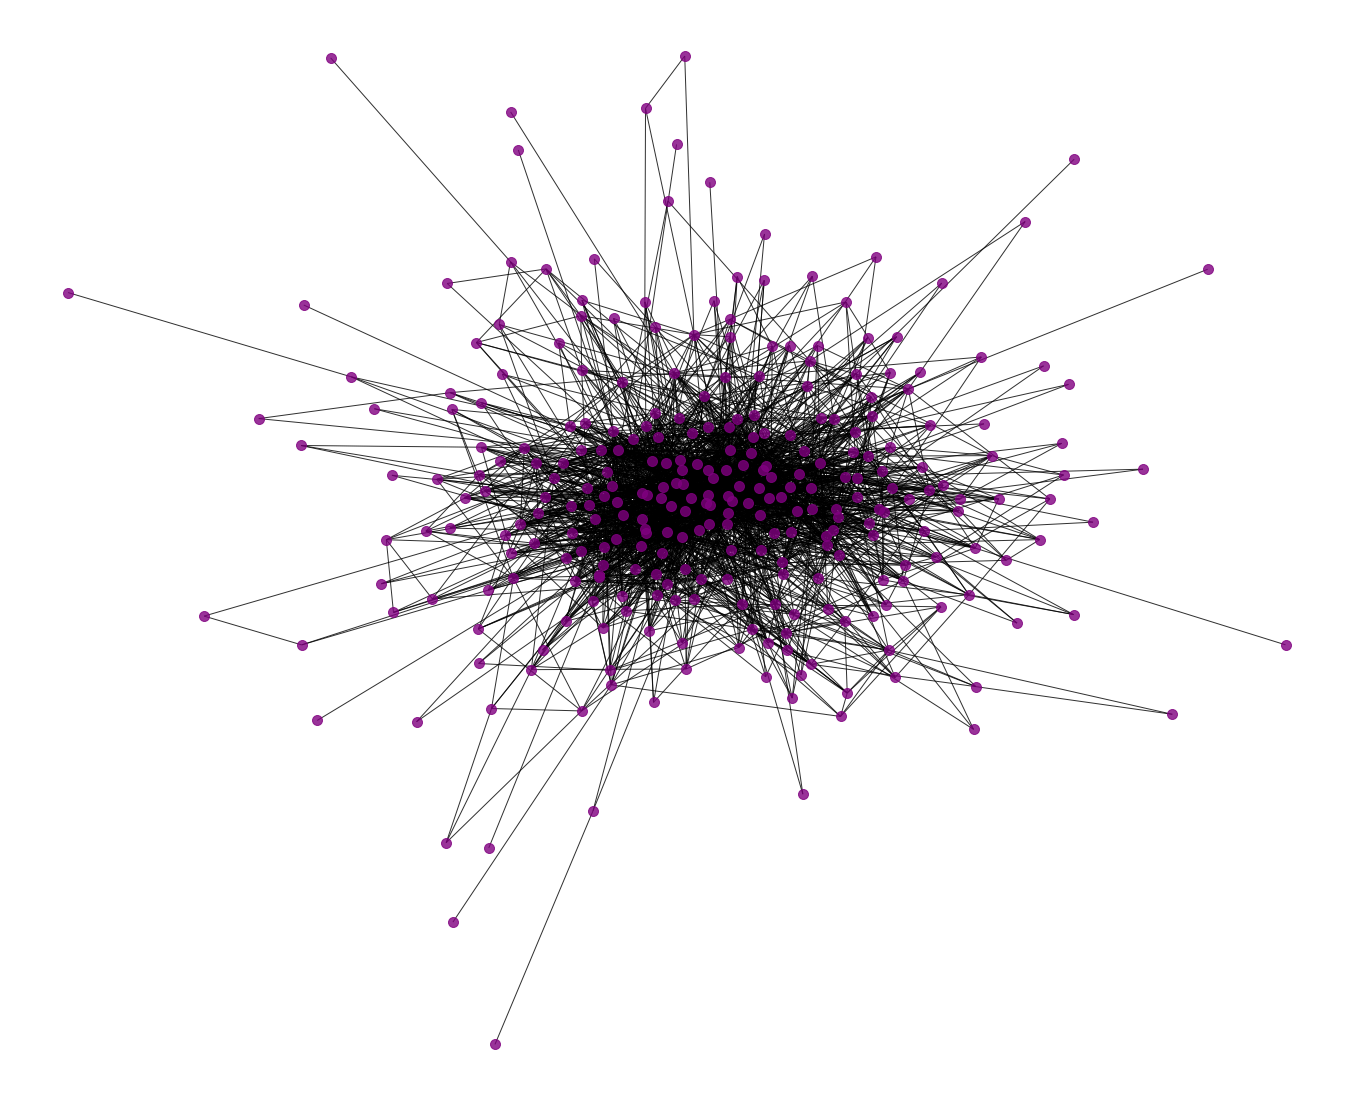

In [21]:
# %% plot the new 1-mode network with essential artists
# set the figure
fig = plt.figure(figsize = (24, 20))
pos = nx.spring_layout(g_b)

# drawing options
options = {'alpha': 0.8,'node_size': 100}

# draw the network
nx.draw_networkx_nodes(g_b, pos, 
                       node_color ='purple',
                       **options)

nx.draw_networkx_edges(g_b, pos, 
                       edge_color ='black',
                       **options)

plt.axis("off")

# save the plot
outfile = os.path.join(wd, 'track artist-artist graph.png')
plt.savefig(outfile)

# Color the nodes by the communities detected from step1

In [22]:
# %% import relevant libraries
import matplotlib.cm as cm

In [23]:
# convert par_df from data frame to dictionary and save it as par_dict
par_df.set_index('artist', inplace = True)
par_dict= par_df.to_dict()

In [24]:
# in order to get a dictionary contains artist and their corresponding communities
par_dict = par_dict['community']
par_dict

{'Nas': 0,
 'YBN Nahmir': 1,
 '6ix9ine': 2,
 'Tyga': 0,
 'Blueface': 1,
 'Clipse': 0,
 'Alicia Keys': 3,
 '42 Dugg': 1,
 'Rick Ross': 0,
 'Stevie Wonder': 0,
 'Vince Staples': 3,
 'EARTHGANG': 2,
 'Usher': 3,
 'Kevin Gates': 1,
 'Lil Dicky': 2,
 'Doe Boy': 1,
 'Mac Miller': 3,
 'MadeinTYO': 2,
 'Ella Mai': 2,
 'Metro Boomin': 1,
 'Landon Cube': 1,
 'Yugen Blakrok': 3,
 'Juicy J': 0,
 'Rae Sremmurd': 1,
 'JID': 2,
 'Sosamann': 1,
 'Bryson Tiller': 3,
 'French Montana': 0,
 'Bruno Mars': 0,
 'The Weeknd': 3,
 'Mike WiLL Made-It': 3,
 'Bobby Shmurda': 2,
 'YG': 0,
 'Young Thug': 1,
 'WizKid': 2,
 'Ne-Yo': 0,
 'Dreamville': 2,
 'Rihanna': 3,
 'Plies': 0,
 'Kenny G': 3,
 'Rowdy Rebel': 2,
 'Jessie Reyez': 2,
 'Aminé': 2,
 'Gunplay': 0,
 'Skylar Grey': 3,
 'Kendrick Lamar': 3,
 'Nicki Minaj': 3,
 'Missy Elliott': 3,
 'DJ Khaled': 0,
 'Tank': 0,
 'Michael Jackson': 3,
 'Zacari': 1,
 'Janet Jackson': 3,
 'Labrinth': 3,
 'SOB X RBE': 1,
 'Money Man': 1,
 'Bad Bunny': 7,
 'Mary J. Blige': 3,
 'U

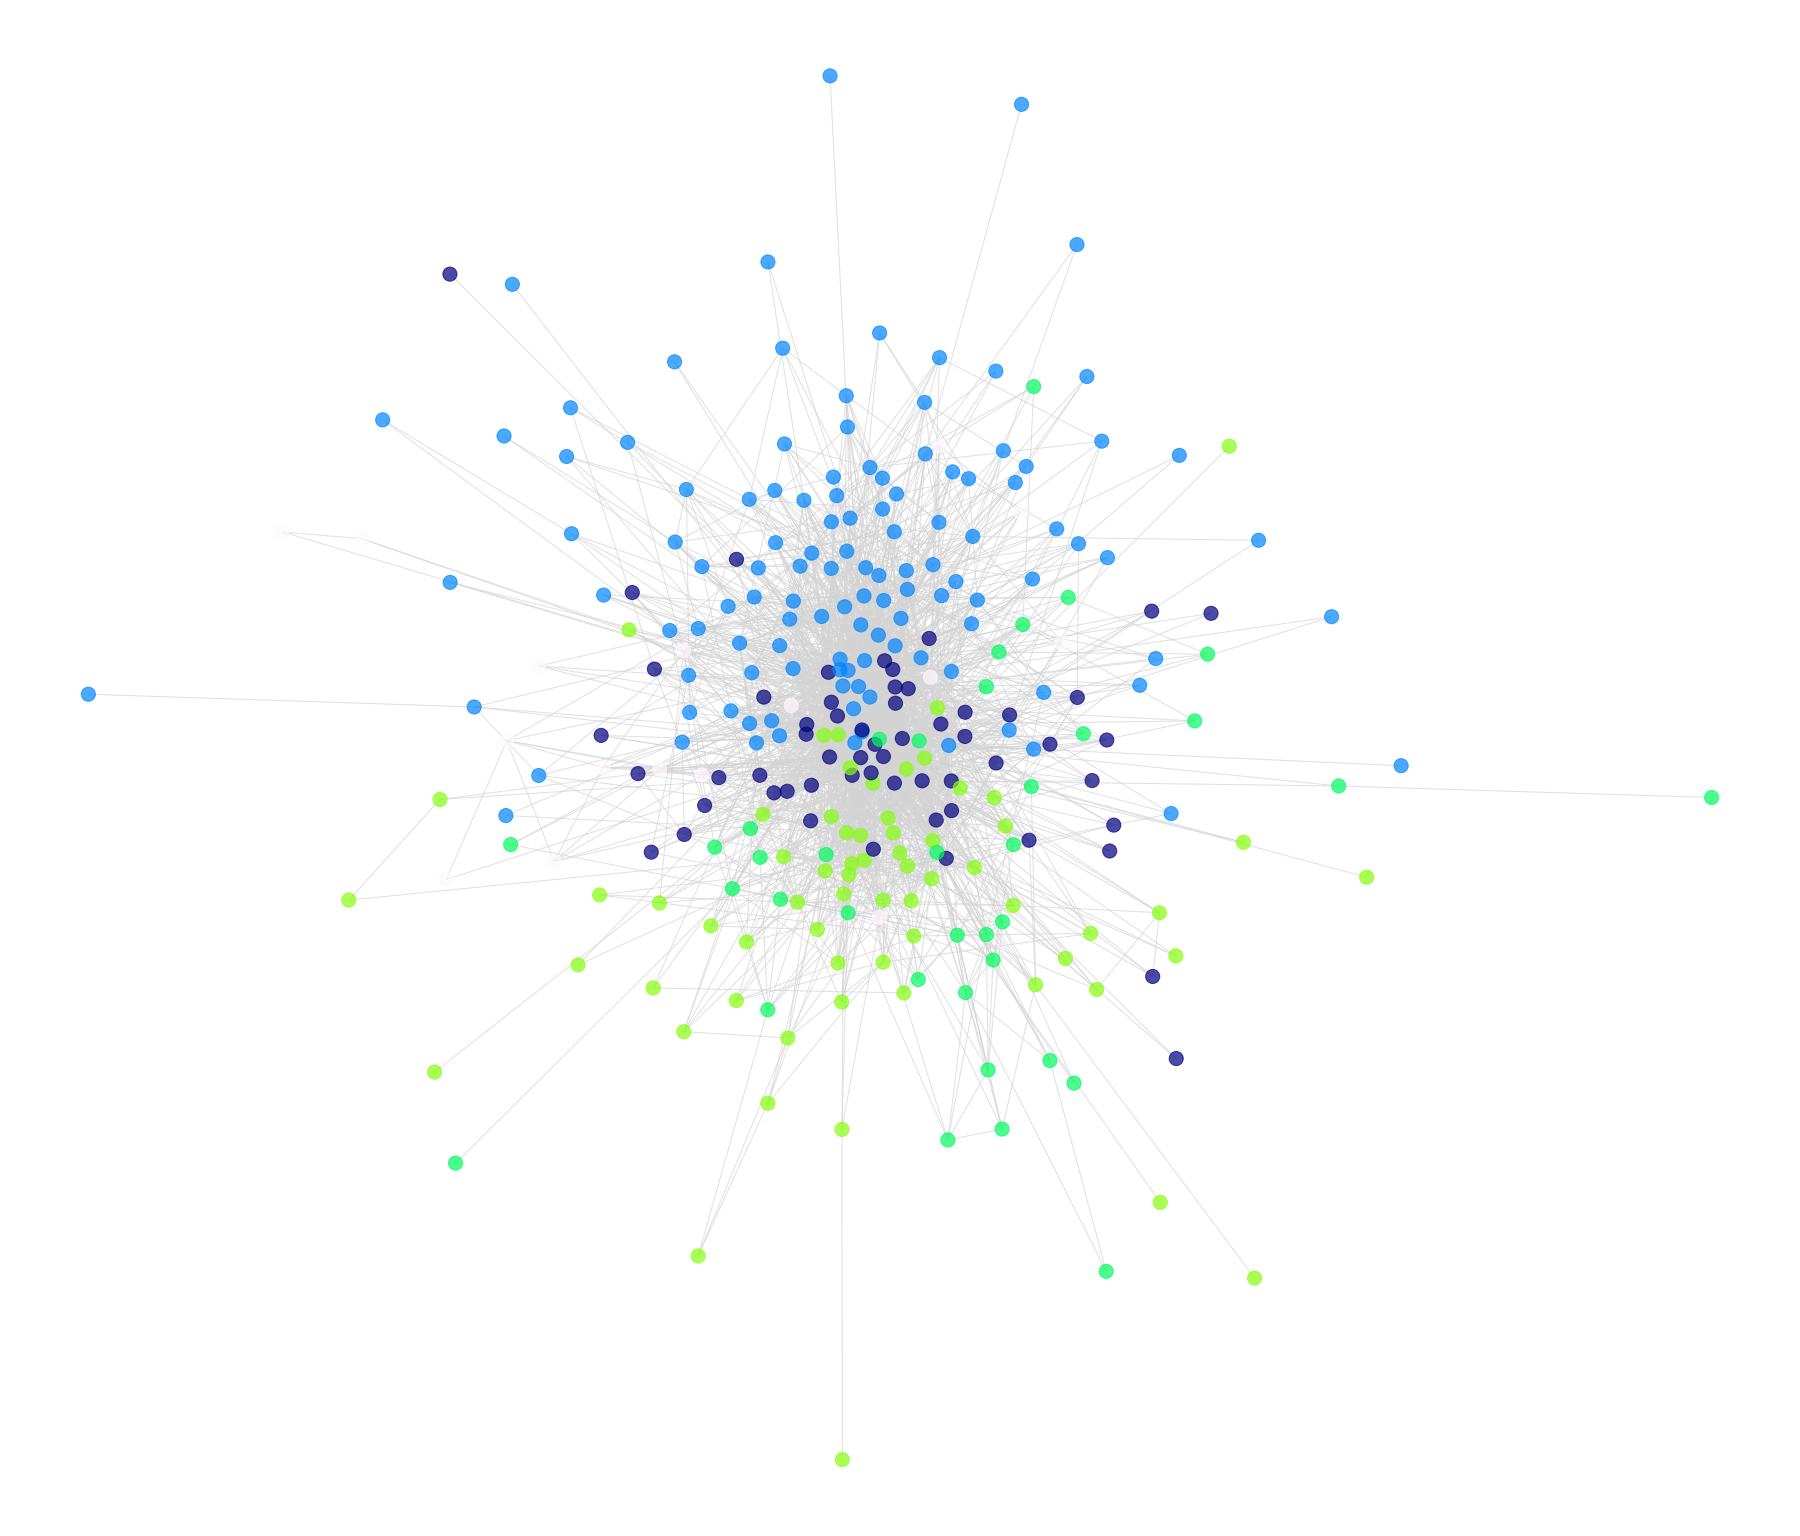

In [46]:
# %% color the node by community
# set the figure
fig = plt.figure(figsize = (32, 28))

# draw the graph
pos = nx.spring_layout(g_b)

# color the nodes according to their partition
cmap = cm.get_cmap('gist_ncar', max(par_dict.values()) + 1)


nx.draw_networkx_nodes(g_b, pos, par_dict.keys(), 
                       node_size=200, alpha = 0.7,
                       cmap=cmap, node_color=list(par_dict.values()))

nx.draw_networkx_edges(g_b, pos, edge_color='lightgrey', alpha=0.7)

plt.axis("off")

# save the plot
outfile = os.path.join(wd, '1collaboration graph by community.png')
plt.savefig(outfile)

# Create a scatter plot (degree centrality & probability of collaborating within community)
- create a scatter plot of the probability of collaborating with artists working on similar genres against degree centrality of artists 
- y-axis: the probability of collaborate with artists in their community
- x-axis: the degree centrality of each artist (i.e number of edges | how many artists each has collaborated with)

In [26]:
# %% import relevant libraries
from networkx.algorithms import degree_centrality

In [27]:
# %% y-axis value

# in order to calculate the probability of an artist collaborting with artists in his/her community
# we compute the ratio between the number of neighbors in the same community and
# the number of total neighbors
for artist in par_df.index:
    neighbor_list = list(g_b[artist].keys())
    c1 = par_df.loc[artist, 'community']
    par_df.loc[artist, 'num_neighbors'] = len(neighbor_list)
    par_df.loc[artist, 'num_similar_neighbor'] = 0
    par_df.loc[artist, 'num_nonsimilar_neighbor'] = 0
    for neighbor in neighbor_list:
        c2 = par_df.loc[neighbor, 'community']
        if c2 == c1:
            par_df.loc[artist, 'num_similar_neighbor'] += 1
        else:
            par_df.loc[artist, 'num_nonsimilar_neighbor'] += 1
par_df.loc[:, 'prob_similar'] = par_df['num_similar_neighbor'] / par_df['num_neighbors']

In [28]:
par_df

,community,num_neighbors,num_similar_neighbor,num_nonsimilar_neighbor,prob_similar
artist,,,,,
Nas,0,38.0,19.0,19.0,0.500000
YBN Nahmir,1,11.0,7.0,4.0,0.636364
6ix9ine,2,13.0,3.0,10.0,0.230769
Tyga,0,50.0,24.0,26.0,0.480000
Blueface,1,19.0,13.0,6.0,0.684211
...,...,...,...,...,...
Static Major,3,2.0,1.0,1.0,0.500000
ScHoolboy Q,3,39.0,17.0,22.0,0.435897
KIDS SEE GHOSTS,2,3.0,2.0,1.0,0.666667


In [29]:
# %% x-axis value

# compute the degree_centrality of each node (artist)
# and convert it to dataframe
degree = degree_centrality(g_b)
degree_df = pd.DataFrame({'artist': list(degree.keys()),
                          'centrality': list(degree.values())})
degree_df

,artist,centrality
0,Fred Hammond,0.003401
1,J Balvin,0.061224
2,Doja Cat,0.017007
3,Nas,0.129252
4,Fetty Wap,0.040816
...,...,...
290,Ariana Grande,0.057823
291,Internet Money,0.068027
292,Jon Z,0.006803
293,50 Cent,0.081633


In [30]:
# add centrality column to par_df
par_df = pd.merge(par_df, degree_df, on = 'artist')
par_df

,artist,community,num_neighbors,num_similar_neighbor,num_nonsimilar_neighbor,prob_similar,centrality
0,Nas,0,38.0,19.0,19.0,0.500000,0.129252
1,YBN Nahmir,1,11.0,7.0,4.0,0.636364,0.037415
2,6ix9ine,2,13.0,3.0,10.0,0.230769,0.044218
3,Tyga,0,50.0,24.0,26.0,0.480000,0.170068
4,Blueface,1,19.0,13.0,6.0,0.684211,0.064626
...,...,...,...,...,...,...,...
290,Static Major,3,2.0,1.0,1.0,0.500000,0.006803
291,ScHoolboy Q,3,39.0,17.0,22.0,0.435897,0.132653
292,KIDS SEE GHOSTS,2,3.0,2.0,1.0,0.666667,0.010204
293,J.I the Prince of N.Y,1,1.0,1.0,0.0,1.000000,0.003401


In [31]:
# save par_df as csv file for step 3
par_df.to_csv('par_df.csv')

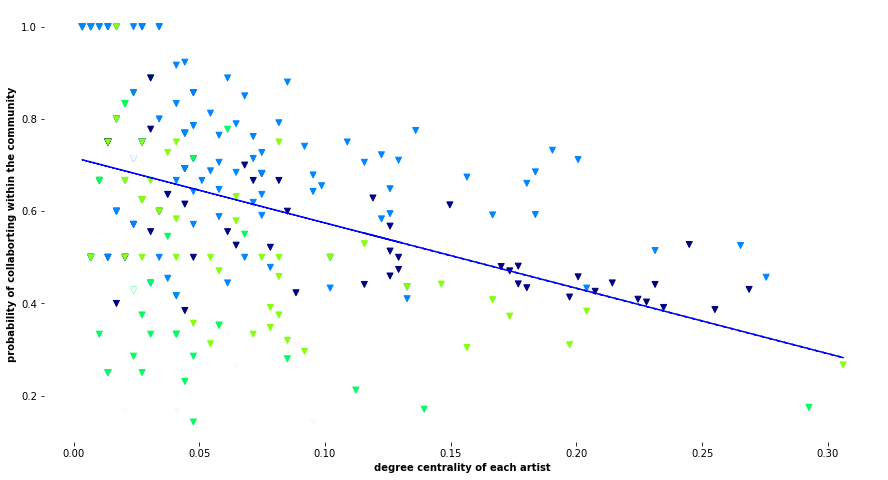

In [47]:
# %% plot the figure

# set the figure size and add plot
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111)

# decide x-axis & y-axis, color
ax.scatter(par_df['centrality'], par_df['prob_similar'],
           cmap = cmap, c = par_df['community'],
           marker = 'v')

# add trendline
z = np.polyfit(par_df['centrality'], par_df['prob_similar'], 1)
p = np.poly1d(z)
plt.plot(par_df['centrality'],p(par_df['centrality']),'b--')

# remove all the spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# set the labels
ax.set_xlabel('degree centrality of each artist', fontweight = 'bold')
ax.set_ylabel('probability of collaborting within the community', 
               fontweight = 'bold')

# save the file
outfile = os.path.join(wd, '1centrality scatter plot.png')
plt.savefig(outfile)